# Prerequisites

## Paths

In [4]:
import os
PATH = os.getcwd()
PATH

'c:\\Users\\bogda\\Desktop\\University\\Year_III\\SEM_2\\DM - Data Mining\\PROJECT'

In [145]:
NUM_BOOKS = 18

CSV_PATH = f'{PATH}\\data'

IMAGE_FOLDER = 'images'

WORDCLOUD_FOLDER = 'word_clouds'
MASK_FOLDER = 'masks'

## Imports

In [5]:
import pandas as pd
from tidytext import unnest_tokens
import nltk
nltk.download('punkt')
import re
from siuba import *
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from tidytext import *
from nltk import *


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bogda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Colors

In [772]:
BLUE = '#9fcaf5'
PINK = '#f6a7ba'

PURPLE = '#c1a3f5'
RED = '#f5a3a3'
GREEN = '#a3f5a7'
DARK_BLUE = '#a3aef5'
ORANGE = '#f5c4a3'
YELLOW = '#f5eea3'
HOT_PINK = '#f5a3e9'

# Texts


## Getting the raw text from pdfs

In [6]:
import fitz 

def get_texts(pdf_path: str) -> str:
    with fitz.open(pdf_path) as pdf:
        text = ""
        for page in pdf:
            text += page.get_text()
        return text

In [7]:
FOLDER = 'books'
BOOK_NAME = 'Re_Zero_V'

re_zero_raw_books = []

for chapter in range(1, NUM_BOOKS + 1):
    pdf_path = f'{PATH}\\{FOLDER}\\{BOOK_NAME}{chapter}.pdf'
    re_zero_raw_books.append(get_texts(pdf_path))

# re_zero_raw_books[1]

## Creating the DataFrames

In [478]:
def chapters_of(df: pd.DataFrame):
    chapter_list = []
    curr_chapter = -1
    for _, row in df.iterrows():
        if re.search('^PROLOGUE$', row['content']):
            curr_chapter = 0
            
        if re.search("^CHAPTER [0-9]+$", row['content']):
            curr_chapter += 1
            
        if re.search('^AFTERWORD$', row['content']):
            curr_chapter = -1
        chapter_list.append(curr_chapter)
    return chapter_list
        

def create_df(text: str, volume: int):
    lines = text.splitlines()

    df = pd.DataFrame({
        "content": lines,
    })
    
    df["volume"] = volume
    df['chapter'] = chapters_of(df)
    df = df[df['chapter'] != -1]
    df = (unnest_tokens(df, "word", "content")).reset_index(drop=True)

    df.head()

    return df


### Main DataFrames

In [479]:
def create_dfs():
    re_zero_dfs = []

    for volume, text in enumerate(re_zero_raw_books):
        re_zero_dfs.append(create_df(text, volume + 1))
        
    return re_zero_dfs

In [481]:
try:
    re_zero_df = pd.read_csv(f'{CSV_PATH}\\re_zero.csv')
except:
    re_zero_dfs = create_dfs()
    re_zero_df = pd.concat(re_zero_dfs)
    re_zero_df.to_csv(f'{CSV_PATH}\\re_zero.csv', index=False)

In [482]:
re_zero_df

volume  chapter          word
0             1        0      prologue
1             1        0           the
2             1        0         waste
3             1        0          heat
4             1        0            of
...         ...      ...           ...
1488807      18        5             a
1488808      18        5  noncombatant
1488809      18        5            as
1488810      18        5          well
1488811      18        5           end

[1488812 rows x 3 columns]

### Novel Texts

In [507]:
text_by_volume = []
for volume in range(1, NUM_BOOKS + 1):
    text_by_volume.append(re_zero_df[re_zero_df['volume'] == volume]['word'].str.cat(sep=' '))

In [714]:
all_text = ' '.join(text_by_volume)

### DataFrames with Word Counts

#### Novel Word Counts

In [483]:
re_zero_words_counted = count(re_zero_df, _.word, sort=True)
re_zero_words_counted

word      n
0                  the  68404
1                    ’  42269
2                   to  36448
3                    “  29372
4                    ”  29347
...                ...    ...
32863          kitties      1
32864    kittensibling      1
32865       kittenlike      1
32866        kiss…bore      1
32867  ………………………………yes      1

[32868 rows x 2 columns]

#### Volume Word Counts

In [712]:
re_zero_words_counted_by_volume = count(re_zero_df, _.volume, _.word, sort=True)
re_zero_words_counted_by_volume

volume     word     n
0           15      the  4389
1            9      the  4381
2           12      the  4287
3            8      the  4284
4           17      the  4195
...        ...      ...   ...
132147       9  marries     1
132148       9  marking     1
132149       9   market     1
132150       9  markers     1
132151      18      ………     1

[132152 rows x 3 columns]

#### Chapter Word Counts

In [713]:
re_zero_words_counted_by_chapter = count(re_zero_df, _.volume, _.chapter, _.word, sort=True)
re_zero_words_counted_by_chapter

volume  chapter        word     n
0            9        5         the  1514
1            8        1         the  1464
2           17        4         the  1389
3            7        2         the  1366
4            4        4         the  1244
...        ...      ...         ...   ...
266904       5        4        pity     1
266905      12        1   assertion     1
266906      12        1  assessment     1
266907      12        1    assigned     1
266908      18        5        …huh     1

[266909 rows x 4 columns]

# Word Cloud

In [923]:
def make_word_cloud(text: str, mask_path: str, save_path: str):
    mask = np.array(Image.open(mask_path))
    a = mask[:, :, 3]
    mask[a != 0] = [0, 0, 0, 255]
    mask[a == 0] = [255, 255, 255, 255]
    
    wordcloud = WordCloud(background_color=PURPLE, mask=mask, width=2220, height=2220, contour_width=3, contour_color='black', colormap='bone')\
        .generate(text)
    plt.figure(figsize = (11, 11))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    
    plt.savefig(save_path, facecolor='black', bbox_inches='tight')

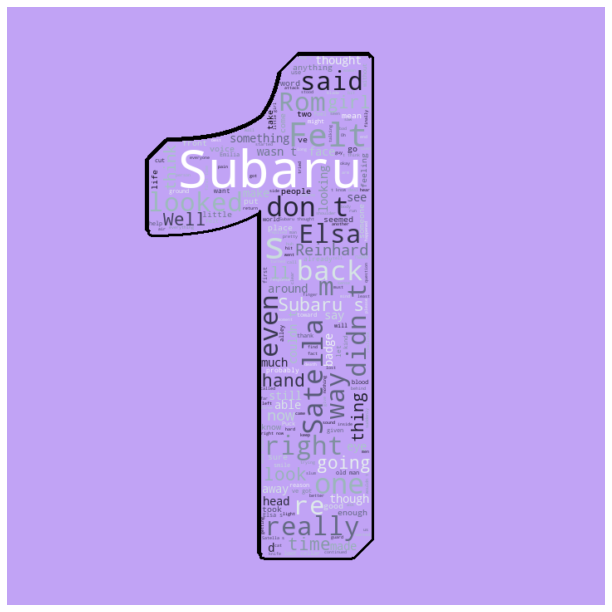

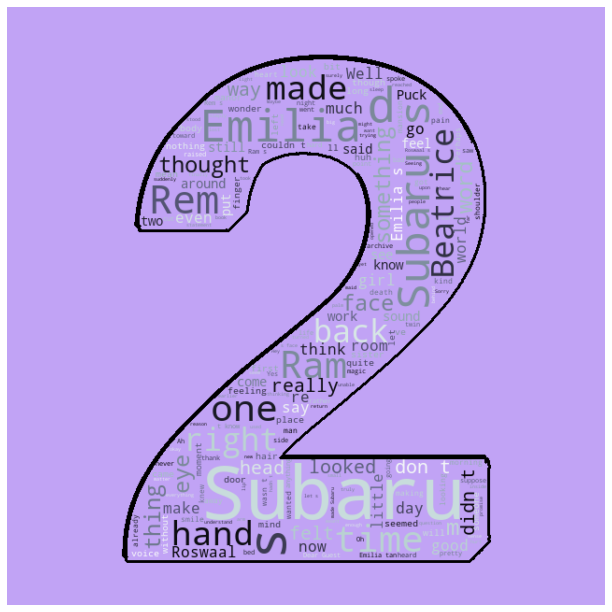

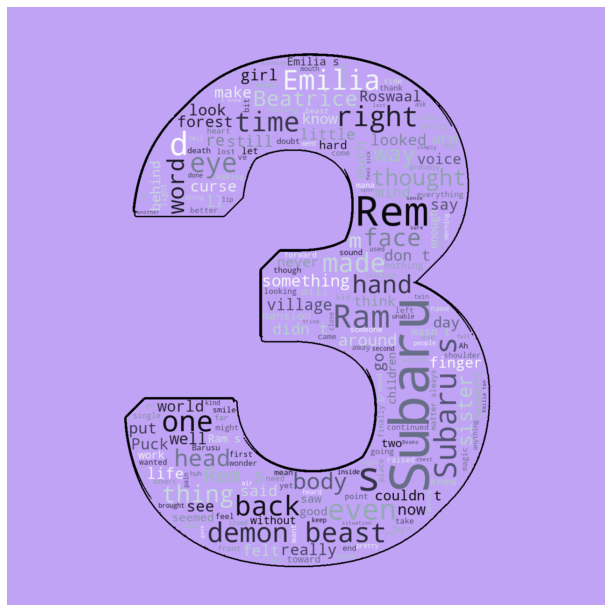

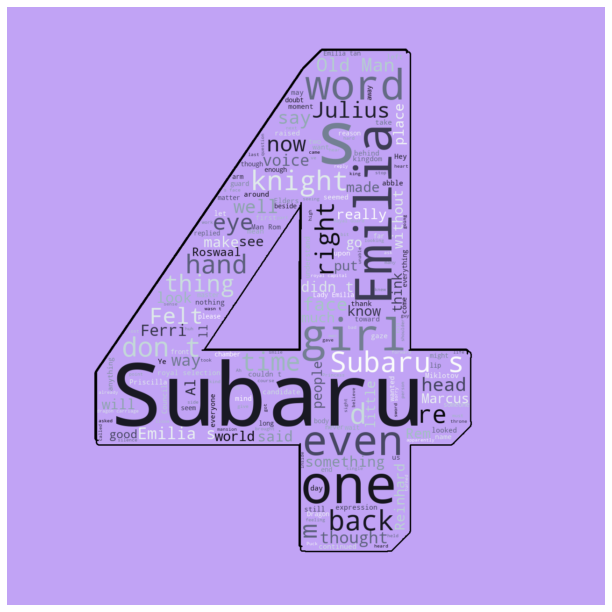

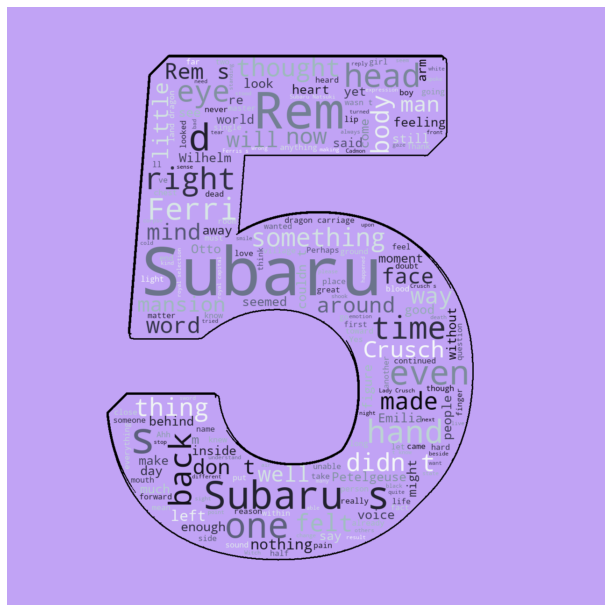

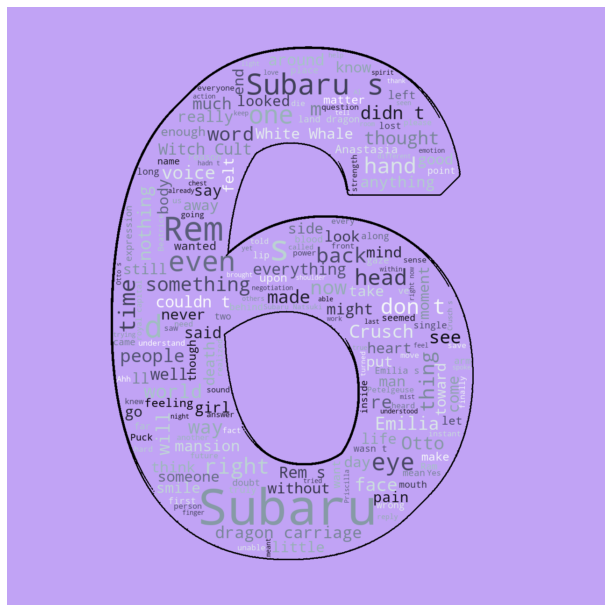

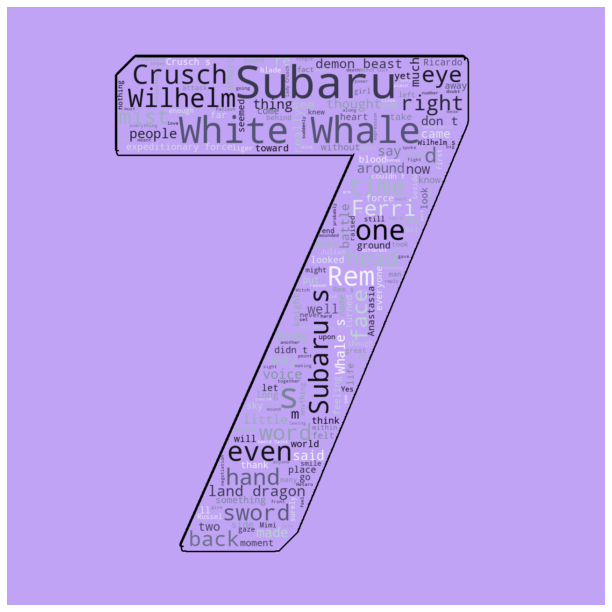

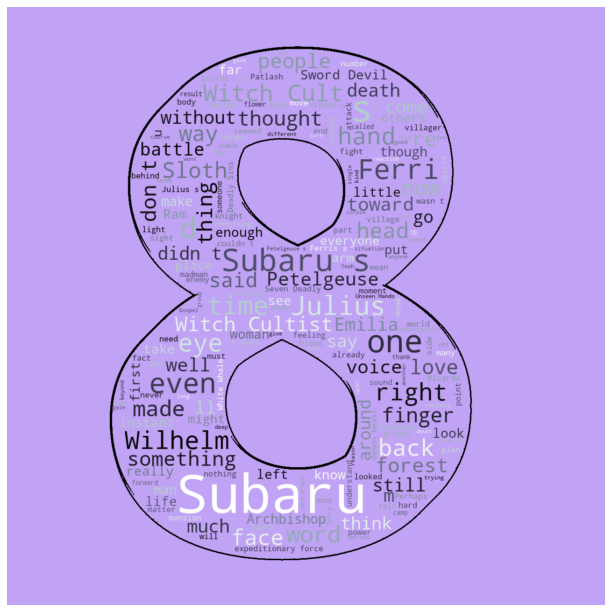

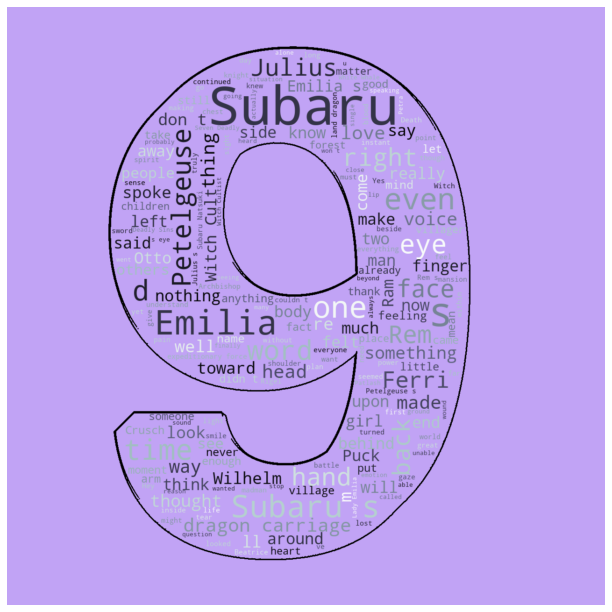

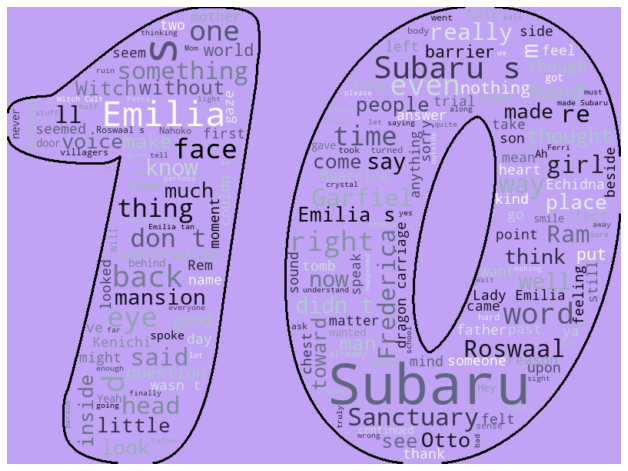

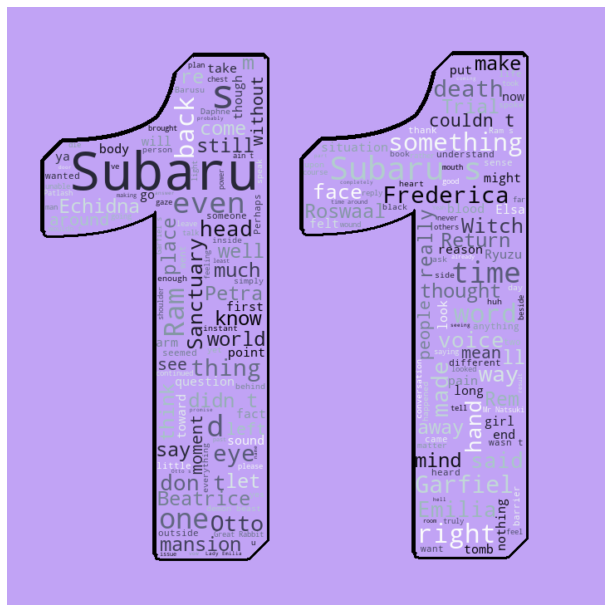

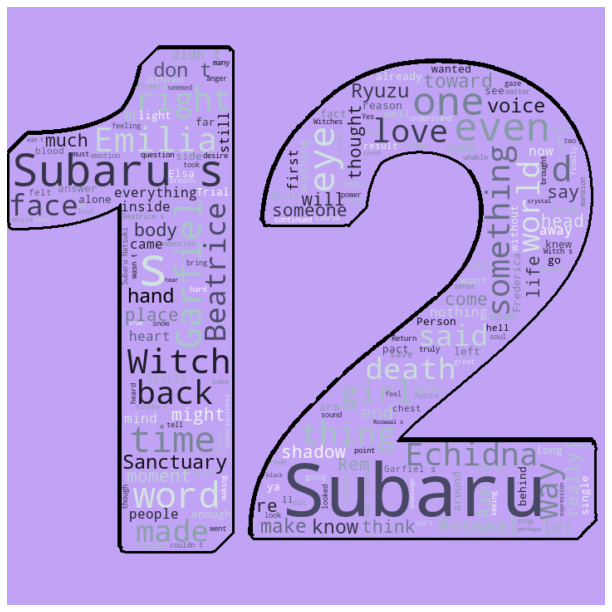

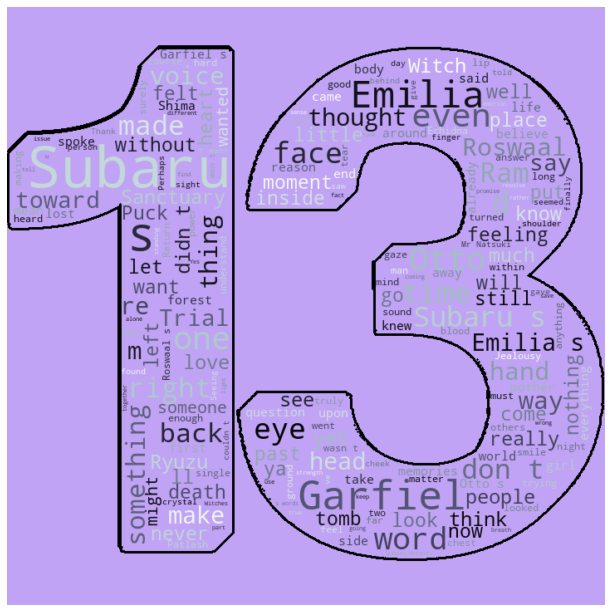

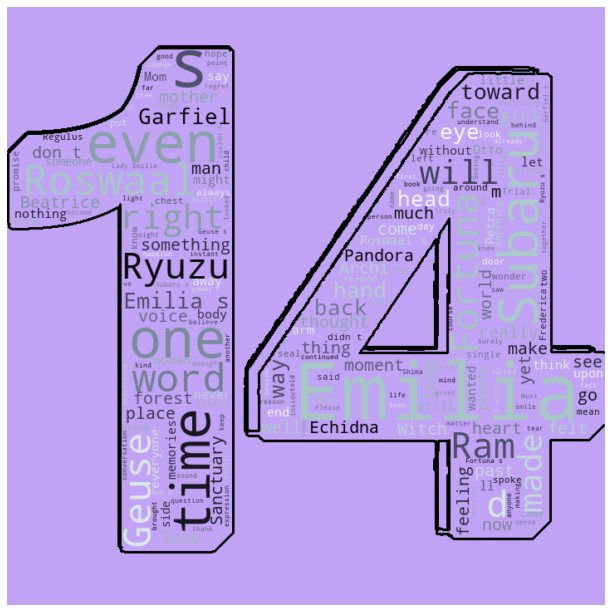

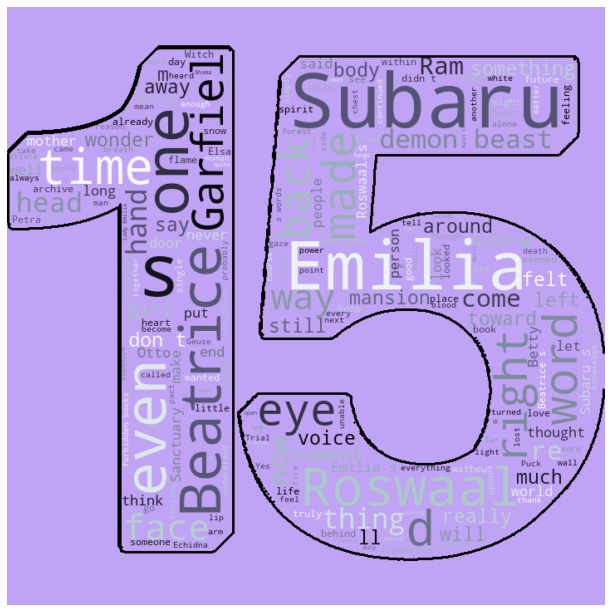

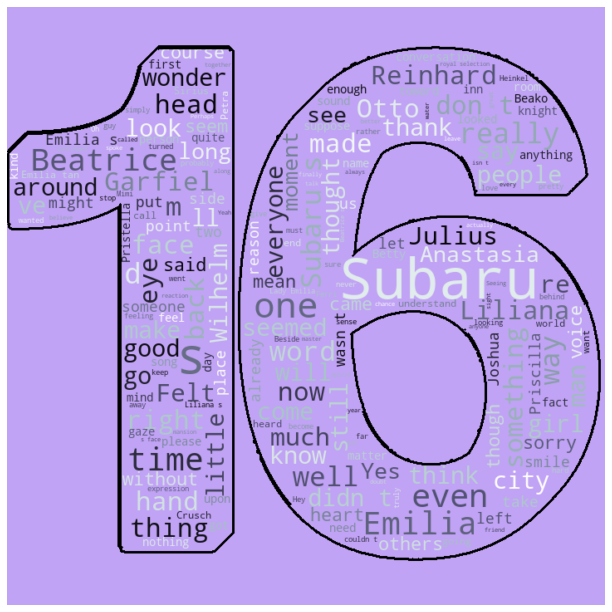

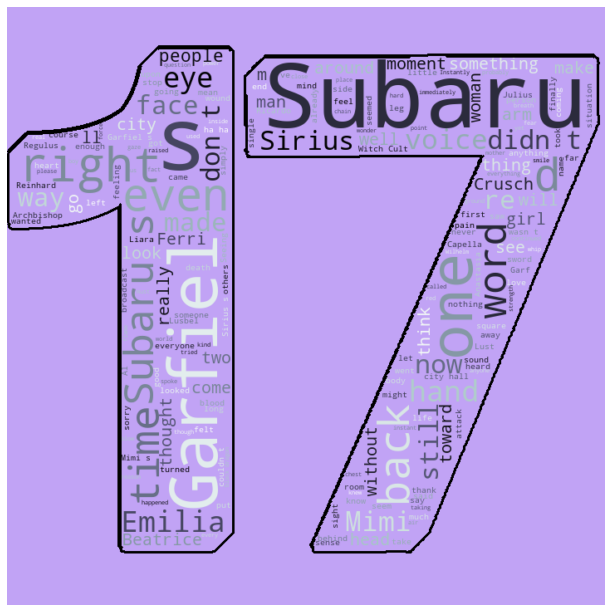

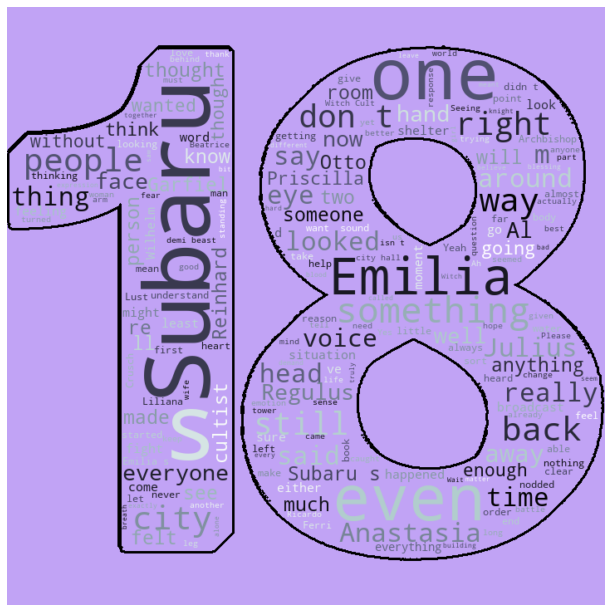

In [924]:
WORDCLOUD_IMAGE_NAME = 'word_cloud'
NUMBER_IMAGE_NAME = 'number'

NUMBER_PATH = f'{PATH}\\{IMAGE_FOLDER}\\{MASK_FOLDER}\\{NUMBER_IMAGE_NAME}'
WORDCLOUD_PATH = f'{PATH}\\{IMAGE_FOLDER}\\{WORDCLOUD_FOLDER}\\{WORDCLOUD_IMAGE_NAME}'

for volume in range(1, NUM_BOOKS + 1):
    number_image = f'{NUMBER_PATH}_{volume}.png'
    wordcloud_image = f'{WORDCLOUD_PATH}_{volume}.png'
    make_word_cloud(re_zero_raw_books[volume - 1], number_image, wordcloud_image)

# DataFrame Cleaning

In [486]:
from nltk.corpus import stopwords

basic_stop_words = stopwords.words('english')
punctuation_signs = ['\'', "''", ';', '"', ',', '.', '!', '?', '/', '[', ']', '(', ')', '“', '”', '’', '‘', '``', "--", ",", "”", "|", ":", ":"]
custom_stop_words = ["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","isbn","pbk","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder", 'm', 'notsatella', 'copyright']

all_stop_words = basic_stop_words + punctuation_signs + custom_stop_words

In [487]:
def clean_volume(df: pd.DataFrame) -> pd.DataFrame:
    return df[~df['word'].isin(all_stop_words)]

In [488]:
clean_re_zero_df = clean_volume(re_zero_df)
clean_re_zero_df

volume  chapter          word
0             1        0      prologue
2             1        0         waste
3             1        0          heat
7             1        0         —this
12            1        0          good
...         ...      ...           ...
1488801      18        5      —another
1488802      18        5    unexpected
1488803      18        5  lifeanddeath
1488804      18        5        battle
1488808      18        5  noncombatant

[522054 rows x 3 columns]

# TF_IDF

In [715]:
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## TF_IDF by Volumes

In [489]:
clean_df_words_counted_by_volume = count(clean_re_zero_df, _.volume, _.word, sort=True)

In [490]:
def get_top_10(df: pd.DataFrame) -> pd.DataFrame:
    return df.head(10)

top_10_words = clean_df_words_counted_by_volume.groupby('volume').apply(get_top_10).reset_index(drop=True)
top_10_words

volume     word     n
0         1   subaru  1354
1         1     felt   424
2         1     elsa   241
3         1     time   237
4         1   looked   226
..      ...      ...   ...
175      18     eyes   151
176      18  regulus   127
177      18    voice   121
178      18   julius   119
179      18   looked   113

[180 rows x 3 columns]

In [492]:
def get_top_tf_idf(n: int) -> pd.DataFrame:
    def func(df: pd.DataFrame) -> pd.DataFrame:
        return df.sort_values(by='tf_idf', ascending=False).head(n)
    
    return func

In [493]:
n = 3
re_zero_tf_idf_per_volume = bind_tf_idf(re_zero_words_counted_by_volume, 'word', 'volume', 'n')
re_zero_tf_idf_per_volume = re_zero_tf_idf_per_volume.groupby('volume').apply(get_top_tf_idf(n)).reset_index(drop=True).drop(columns=['tf', 'idf', 'n'])

In [716]:
fig = px.histogram(re_zero_tf_idf_per_volume, x='volume', y='tf_idf', color='word', nbins=n*NUM_BOOKS)
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font = {
        'size': 18,
        'color': 'white'
    },
    xaxis = {
        'title': 'Word',
        'tickmode': 'linear',
        'dtick': 1
    }, 
    yaxis = {
        'title': 'Score',
    }
)
fig.show()

## Most Important Words

In [496]:
re_zero_tf_idf = bind_tf_idf(re_zero_words_counted_by_volume, 'word', 'volume', 'n')
re_zero_tf_idf = re_zero_tf_idf.sort_values(by='tf_idf', ascending=False).head(10).reset_index(drop=True).drop(columns=['tf', 'idf', 'n'])

In [497]:
fig = px.bar(re_zero_tf_idf[::-1], y='word', x='tf_idf', width=800, color_discrete_sequence=[PINK])
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font = {
        'size': 18,
        'color': 'white'
    },
    xaxis = {
        'title': 'TF_IDF',
    }, 
    yaxis = {
        'title': 'Words',
    }
)
fig.show()

# N-grams

In [498]:
create_bigram = 2
create_trigram = 3

In [717]:
from nltk import ngrams, word_tokenize

def create_gram_df(text, volume_num, grams):
    generator = ngrams(word_tokenize(text.lower()), grams)
    re_zero_grams = [ ' '.join(grams) for grams in generator]

    grams_df = pd.DataFrame({
        "volume": volume_num,
        "bigrams" if grams == 2 else "trigrams": re_zero_grams,
    })

    return grams_df

## Bigrams

In [718]:
bigram_collection = []

for index, txt in enumerate(text_by_volume):
    bigram_collection.append(create_gram_df(txt, index + 1, create_bigram))

bigram_df = pd.concat(bigram_collection)

bigram_df[['word1', 'word2']] = bigram_df['bigrams'].str.split(expand=True)


bigram_df = bigram_df[~bigram_df['word2'].isin(all_stop_words)]  
bigram_df = bigram_df[~bigram_df['word1'].isin(all_stop_words)]  

bigram_df.reset_index(drop=True, inplace=True)
bigram_df



volume                  bigrams         word1         word2
0            1               waste heat         waste          heat
1            1             good feeling          good       feeling
2            1             hard texture          hard       texture
3            1          fallen facedown        fallen      facedown
4            1              entire body        entire          body
...        ...                      ...           ...           ...
149460      18             toothy mouth        toothy         mouth
149461      18         cackled —another       cackled      —another
149462      18      —another unexpected      —another    unexpected
149463      18  unexpected lifeanddeath    unexpected  lifeanddeath
149464      18      lifeanddeath battle  lifeanddeath        battle

[149465 rows x 4 columns]

In [719]:
bigram_df_count = count(bigram_df, _.bigrams, sort=True)
bigram_df_count_top = bigram_df_count.head(30)

In [720]:
fig = px.bar(bigram_df_count_top[::-1], y='bigrams', x='n', width=800, height=1000, color_discrete_sequence=[PINK])
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='Bigrams',
    title_x=0.5,
    font = {
        'size': 18,
        'color': 'white'
    },
    xaxis = {
        'title': None,
    }, 
    yaxis = {
        'title': None,
    }
)
fig.show()

In [ ]:
top_15_bigrams.reset_index(inplace=True)

top_15_bigrams['vol'] = top_15_bigrams['volume']

top_15_bigrams = top_15_bigrams.drop(columns=['index', 'volume'])

#top_15_bigrams.to_csv('top_15_bigrams.csv')

top_15_bigrams

bigrams   n  vol
0       loot cellar  58    1
1    subaru thought  54    1
2     subaru looked  31    1
3       subaru felt  30    1
4        shop owner  27    1
..              ...  ..  ...
265  subaru natsuki  13   18
266    eyes widened  12   18
267     lady crusch  12   18
268   control tower  11   18
269     sword devil  11   18

[270 rows x 3 columns]

In [ ]:
all_volumes_bigrams = count(bigram_df, _.bigrams, sort=True)
#all_volumes_bigrams.head(15).to_csv('top_15_bigrams_overall.csv')
all_volumes_bigrams.head(10)

bigrams    n
0      white whale  629
1       witch cult  479
2      lady emilia  408
3  dragon carriage  393
4   subaru natsuki  358
5      land dragon  338
6      demon beast  276
7     demon beasts  251
8      subaru felt  224
9  royal selection  217

### By analyzing bigrams we can get a 'sense' of the world 

3 bigrams with that lead to 'dark' situations

In [ ]:
count(bigram_df[bigram_df['word1'] == 'dark'], _.bigrams, sort=True).head(10)

bigrams  n
0     dark magic  9
1     dark cloud  6
2  dark emotions  5
3   dark element  4
4    dark forest  4
5    dark shadow  4
6      dark eyes  4
7  dark corridor  3
8     dark alley  3
9       dark red  3

In [ ]:
count(bigram_df[bigram_df['word1'] == 'dead'], _.bigrams, sort=True).head(10)

bigrams  n
0       dead weight  5
1          dead man  4
2       dead person  4
3         dead body  4
4         dead face  3
5       dead center  3
6       dead subaru  3
7  dead seriousness  2
8       dead people  2
9       dead ringer  2

In [ ]:
count(bigram_df[bigram_df['word1'] == 'blood'], _.bigrams, sort=True).head(10)

bigrams   n
0     blood flowed  18
1    blood spatter  15
2   blood coursing  13
3    blood flowing  13
4       blood loss  11
5  blood scattered  10
6     blood gushed   8
7  blood trickling   7
8     blood poured   6
9   blood dripping   5

3 bigrams that lead to 'happy' situations

In [ ]:
count(bigram_df[bigram_df['word1'] == 'happy'], _.bigrams, sort=True).head(10)

bigrams  n
0      happy family  4
1      happy future  4
2         happy to…  2
3         happy day  2
4  happy expression  2
5        happy news  2
6    happy feelings  2
7     happy reunion  2
8      happy subaru  2
9       happy coin—  1

In [ ]:
count(bigram_df[bigram_df['word1'] == 'smile'], _.bigrams, sort=True).head(10)

bigrams  n
0    smile coming  9
1   smile crossed  5
2  smile vanished  5
3  smile deepened  3
4      smile slip  3
5  smile suddenly  3
6  smile remained  3
7    smile carved  3
8  smile appeared  2
9     smile suits  2

In [ ]:
count(bigram_df[bigram_df['word1'] == 'light'], _.bigrams, sort=True).head(10)

bigrams   n
0    light novels  19
1      light body  11
2      light wave   5
3     light sound   5
4       light pat   4
5     light faded   4
6     light shone   4
7  light vanished   4
8    light gushed   4
9    light surged   4

From bigrams like 'smile vanished', 'light faded' we can observe that even the 'happy' ones more often than not lead to a 'dark' and 'tragic' route

## Trigrams

In [721]:
trigram_collection = []

for index, txt in enumerate(text_by_volume):
    trigram_collection.append(create_gram_df(txt, index + 1, create_trigram))

trigram_df = pd.concat(trigram_collection)

trigram_df[['word1', 'word2', 'word3']] = trigram_df['trigrams'].str.split(expand=True)

trigram_df_clean = trigram_df.copy()
trigram_df_clean = trigram_df_clean[~trigram_df_clean['word1'].isin(all_stop_words)]  
trigram_df_clean = trigram_df_clean[~trigram_df_clean['word2'].isin(all_stop_words)]  
trigram_df_clean = trigram_df_clean[~trigram_df_clean['word3'].isin(all_stop_words)]  

trigram_df_clean.reset_index(drop=True, inplace=True)


In [722]:
trigram_df_count = count(trigram_df_clean, _.trigrams, sort=True)
trigram_df_count_top = trigram_df_count.head(30)

trigram_df_count

trigrams   n
0             water gate city  27
1            eyes opened wide  23
2              kill kill kill  22
3          blessed gold coins  21
4         wind repel blessing  20
...                       ...  ..
37603         front otto wore   1
37604          front paw high   1
37605      front paw smashing   1
37606  front paws responsible   1
37607        …young su surely   1

[37608 rows x 2 columns]

In [723]:
fig = px.bar(trigram_df_count_top[::-1], y='trigrams', x='n', width=800, height=1000, color_discrete_sequence=[BLUE])
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='Trigrams',
    title_x=0.5,
    font = {
        'size': 18,
        'color': 'white'
    },
    xaxis = {
        'title': None,
        'autorange': 'reversed',
    }, 
    yaxis = {
        'title': None,
        # axis float right
        'side': 'right',
    }
)
fig.show()

In [564]:
archbishops = trigram_df[(trigram_df['word1'] == 'archbishop') & (trigram_df['word2'] == 'of') & (trigram_df['word3'] != 'the')]

archbishops_cnt = count(archbishops, _.trigrams, sort=True)
archbishops_cnt

trigrams   n
0           archbishop of sloth  20
1            archbishop of lust  19
2           archbishop of wrath  13
3        archbishop of gluttony   4
4     archbishop of gluttony—if   1
5           archbishop of greed   1
6   archbishop of greed—regulus   1
7          archbishop of greed…   1
8           archbishop of lust—   1
9             archbishop of sin   1
10    archbishop of sloth…maybe   1
11       archbishop of wrath—my   1
12         archbishop of wrath…   1

In [565]:
archbishops_cnt1 = archbishops_cnt[0:4]
archbishops_cnt2 = archbishops_cnt[5:6]
archbishops_cnt3 = archbishops_cnt[9:10]

archbishops_cnt = pd.concat([archbishops_cnt1, archbishops_cnt2, archbishops_cnt3])
archbishops_cnt

trigrams   n
0     archbishop of sloth  20
1      archbishop of lust  19
2     archbishop of wrath  13
3  archbishop of gluttony   4
5     archbishop of greed   1
9       archbishop of sin   1

In [925]:
fig = px.bar(archbishops_cnt[::-1], y='trigrams', x='n', width=800, height=400, color_discrete_sequence=[PURPLE])
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='Archbishops',
    title_x=0.5,
    font = {
        'size': 18,
        'color': 'white'
    },
    xaxis = {
        'title': None,
    }, 
    yaxis = {
        'title': None,
    }
)
fig.show()

# Sentiment Analysis

## Afinn

In [ ]:
from afinn import Afinn
afinn = Afinn()

In [ ]:
def get_total_afinn_score(df: pd.DataFrame) -> pd.DataFrame:
    return df['total_afinn_score'].sum()

### Afinn score per volume

In [ ]:
word_scores = [afinn.score(word) for word in re_zero_words_counted_by_volume['word']]

re_zero_afinn_per_volume = re_zero_words_counted_by_volume.assign(afinn_score=word_scores)
re_zero_afinn_per_volume['total_afinn_score'] = re_zero_afinn_per_volume['afinn_score'] * re_zero_afinn_per_volume['n']

In [ ]:
afinn_score_per_volume = re_zero_afinn_per_volume.groupby('volume').apply(get_total_afinn_score).to_frame("score").reset_index()

In [702]:
fig = px.bar(afinn_score_per_volume, x='volume', y='score', color='score', width=1200, color_continuous_scale=[BLUE, '#ffffff', PINK])
fig.update_layout(
    paper_bgcolor= 'rgba(0,0,0,0)',
    plot_bgcolor= 'rgba(0,0,0,0)',
    font = {
        'size': 18,
        'color': 'white'
    },
    xaxis = {
        'title': 'Volume',
        'tickmode': 'linear',
        'dtick': 1
    }, 
    yaxis = {
        'title': 'AFINN Score',
    }
)
fig.update_coloraxes(
    colorbar = {
        'title': 'Score',
        'nticks': 8
    },
    cmin = -2000,
    cmax = 2000
)
fig.show()

### Afinn score per chapter

In [ ]:
word_scores = [afinn.score(word) for word in re_zero_words_counted_by_chapter['word']]

re_zero_afinn_per_chapter = re_zero_words_counted_by_chapter.assign(afinn_score=word_scores)
re_zero_afinn_per_chapter['total_afinn_score'] = re_zero_afinn_per_chapter['afinn_score'] * re_zero_afinn_per_chapter['n']

In [ ]:
afinn_score_per_chapter = re_zero_afinn_per_chapter.groupby(['volume', 'chapter']).apply(get_total_afinn_score).to_frame("score").reset_index()

In [701]:
fig = px.bar(afinn_score_per_chapter, x='volume', y='score', color='score', width=1200, hover_data={'volume': False, 'chapter': True}, color_continuous_scale='Picnic')
fig.update_layout(
    paper_bgcolor= 'rgba(0,0,0,0)',
    plot_bgcolor= 'rgba(0,0,0,0)',
    font = {
        'size': 18,
        'color': 'white'
    },
    xaxis = {
        'title': 'Volume',
        'tickmode': 'linear',
        'dtick': 1
    }, 
    yaxis = {
        'title': 'Positive/Negative Score',
    }
)
fig.update_coloraxes(
    colorbar = {
        'title': 'Chapter Score',
        'dtick': 400
    },
    cmin = -800,
    cmax = 800
)
fig.show()

#### Afinn score ranges per volume

In [ ]:
fig = px.box(afinn_score_per_chapter, x='volume', y='score', points=False, width=1200)
fig.update_layout(
    paper_bgcolor= 'rgba(0,0,0,0)',
    plot_bgcolor= 'rgba(0,0,0,0)',
    font = {
        'size': 18,
        'color': 'white'
    },
    xaxis = {
        'title': 'Volume',
        'tickmode': 'linear',
        'dtick': 1
    }, 
    yaxis = {
        'title': 'Chapter Score Ranges',
    }
)
fig.show()

In [696]:
fig = px.scatter(afinn_score_per_chapter, x='volume', y='score', color='score', hover_data={'volume': False, 'chapter': True}, width=1200, color_continuous_scale='Plotly3')
fig.update_layout(
    paper_bgcolor= 'rgba(0,0,0,0)',
    plot_bgcolor= 'rgba(0,0,0,0)',
    font = {
        'size': 18,
        'color': 'white'
    },
    xaxis = {
        'title': 'Volume',
        'tickmode': 'linear',
        'dtick': 1
    }, 
    yaxis = {
        'title': 'Chapter Score Ranges',
    }
)
fig.update_traces(
    marker={
        'size': 14,
        'line': {
            'width': 1,
            'color': 'white'
        }
    }
)
fig.update_coloraxes(
    colorbar = {
        'title': 'Chapter Score',
        'dtick': 400
    },
    cmin = -800,
    cmax = 800
)
fig.show()

#### Afinn scores per chapter

In [603]:
afinn_score_per_chapter['volume - chapter'] = afinn_score_per_chapter['volume'].astype(str) + ' - ' + afinn_score_per_chapter['chapter'].astype(str)
afinn_score_per_chapter['volume'] = afinn_score_per_chapter['volume'].astype(str)

In [608]:
volume_colors = ['#7A6DAE', '#E76F97', '#1EB9DF', '#F7C104', '#008C44', '#E96B71', '#E30114', '#CD6116', '#E62F8B', '#000000', '#E60112', '#C80081', '#F3D846', '#A7308B', '#B71157', '#00A786', '#A573B0', '#B50081']

fig = px.bar(afinn_score_per_chapter, x='volume - chapter', y='score', color='volume', width=1800, height=600, hover_data={'volume': False, 'chapter': True}, color_discrete_sequence=volume_colors)
fig.update_layout(
    paper_bgcolor= 'rgba(0,0,0,0)',
    plot_bgcolor= 'rgba(0,0,0,0)',
    font = {
        # 'size': 18,
        'color': 'white'
    },
    xaxis = {
        'title': 'Volume',
        'tickmode': 'linear',
        'dtick': 1
    }, 
    yaxis = {
        'title': 'Chapter Score Ranges',
    }
)
fig.show()

## NLTK Vader

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bogda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
def get_nltk_score(text: str) -> float:
    score = sia.polarity_scores(text)['compound']
    
    return {
        'sentiment': 'negative' if score < 0 else 'positive' if score > 0 else 'neutral',
        'score': score
    }


In [ ]:
nltk_scores = [get_nltk_score(word) for word in re_zero_words_counted_by_volume['word']]
score_df = pd.DataFrame(nltk_scores)

In [ ]:
re_zero_nltk = pd.concat([re_zero_words_counted_by_volume, score_df], axis=1)

In [ ]:
re_zero_nltk_sentiments = re_zero_nltk[re_zero_nltk['sentiment'] != 'neutral'].reset_index(drop=True)
re_zero_nltk_sentiments['total'] = re_zero_nltk_sentiments['n'] * re_zero_nltk_sentiments['score']

### NLTK score per volume split into positive and negative

In [ ]:
def get_total_nltk_score(df: pd.DataFrame) -> float:
    return df['total'].sum()

re_zero_sentiment_score_by_volume = re_zero_nltk_sentiments.groupby(['volume', 'sentiment']).apply(get_total_nltk_score).to_frame("score").reset_index()

In [ ]:
fig = px.bar(re_zero_sentiment_score_by_volume, x='volume', y='score', color='sentiment', width=1200, hover_data={'volume': False, 'sentiment': False}, labels={'sentiment': 'Sentiment'}, color_discrete_sequence=[PINK, BLUE])
fig.update_layout(
    font = {
        'size': 18
    },
    xaxis = {
        'title': 'Volume',
        'tickmode': 'linear',
        'dtick': 1
    }, 
    yaxis = {
        'title': 'NTLK Score',
    }
)
fig.show()

### Positive and negative words per volume

In [ ]:
def get_total_nltk_counts(df: pd.DataFrame) -> float:
    return df['n'].sum()

re_zero_sentiment_counts_by_volume = re_zero_nltk_sentiments.copy()
re_zero_sentiment_counts_by_volume.loc[re_zero_sentiment_counts_by_volume['sentiment'] == 'negative', 'n'] *= -1
re_zero_sentiment_counts_by_volume = re_zero_sentiment_counts_by_volume.groupby(['volume', 'sentiment']).apply(get_total_nltk_counts).to_frame("n").reset_index()

In [ ]:
fig = px.bar(re_zero_sentiment_counts_by_volume, x='volume', y='n', color='sentiment', width=1200, hover_data={'volume': False, 'sentiment': False}, labels={'sentiment': 'Sentiment'}, color_discrete_sequence=[PINK, BLUE])
fig.update_layout(
    font = {
        'size': 18
    },
    xaxis = {
        'title': 'Volume',
        'tickmode': 'linear',
        'dtick': 1
    }, 
    yaxis = {
        'title': 'Words',
    }
)
fig.show()

### Positive and negative word clouds

In [609]:
nltk_scores = [get_nltk_score(word) for word in re_zero_words_counted['word']]
score_df = pd.DataFrame(nltk_scores)

In [610]:
re_zero_nltk = pd.concat([re_zero_words_counted, score_df], axis=1)
re_zero_nltk

word      n sentiment  score
0                  the  68404   neutral    0.0
1                    ’  42269   neutral    0.0
2                   to  36448   neutral    0.0
3                    “  29372   neutral    0.0
4                    ”  29347   neutral    0.0
...                ...    ...       ...    ...
32863          kitties      1   neutral    0.0
32864    kittensibling      1   neutral    0.0
32865       kittenlike      1   neutral    0.0
32866        kiss…bore      1   neutral    0.0
32867  ………………………………yes      1   neutral    0.0

[32868 rows x 4 columns]

In [611]:
positive_words = re_zero_nltk[re_zero_nltk['sentiment'] == 'positive'].drop(['score', 'sentiment'], axis=1).set_index('word')
positive_words_dict = positive_words.to_dict()['n']

negative_words = re_zero_nltk[re_zero_nltk['sentiment'] == 'negative'].drop(['score', 'sentiment'], axis=1).set_index('word')
negative_words_dict = negative_words.to_dict()['n']

In [674]:
def create_wordcloud(frequencies: dict, mask_path: str, color: str, colormap: 'str'):
    mask = np.array(Image.open(mask_path))
    a = mask[:, :, 3]
    mask[a != 0] = [0, 0, 0, 255]
    mask[a == 0] = [255, 255, 255, 255]
    
    wordcloud = WordCloud(background_color=color, mask=mask, width=1200, height=1200, contour_width=2, contour_color='white', colormap=colormap)\
        .generate_from_frequencies(frequencies)
        
    return wordcloud

In [643]:
POSITIVE_MASK_PATH = f'{PATH}\\{IMAGE_FOLDER}\\{MASK_FOLDER}\\rem.png'
NEGATIVE_MASK_PATH = f'{PATH}\\{IMAGE_FOLDER}\\{MASK_FOLDER}\\ram.png'

BOTH_IMG_PATH = f'{PATH}\\{IMAGE_FOLDER}\\{WORDCLOUD_FOLDER}\\raem.png'

In [679]:
positive_wordcloud = create_wordcloud(positive_words_dict, POSITIVE_MASK_PATH, BLUE, 'Blues')
negative_wordcloud = create_wordcloud(negative_words_dict, NEGATIVE_MASK_PATH, PINK, 'Reds')

In [ ]:
positive_wordcloud.to_file(BOTH_IMG_PATH)

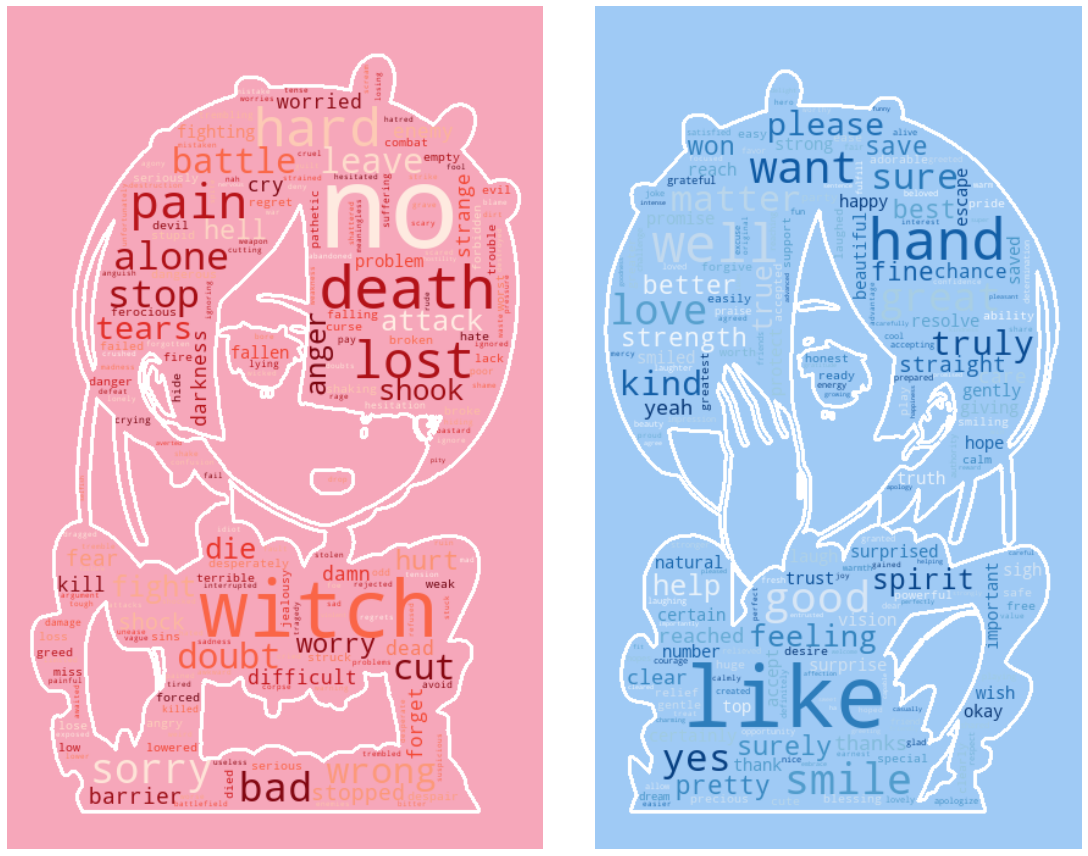

In [680]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))
for i, wordcloud in enumerate([negative_wordcloud, positive_wordcloud]):
    ax.ravel()[i].imshow(wordcloud, interpolation='bilinear')
    ax.ravel()[i].axis('off')

plt.tight_layout()
plt.savefig(BOTH_IMG_PATH, facecolor='black', bbox_inches='tight')

## NRC

In [703]:
from nrclex import NRCLex

In [724]:
re_zero_emotions = NRCLex(all_text)

In [725]:
re_zero_emotions.top_emotions

[('negative', 0.18510253896306036)]

In [726]:
re_zero_emotions.raw_emotion_scores

{'anticipation': 32209,
 'disgust': 19245,
 'negative': 63624,
 'joy': 23081,
 'positive': 59420,
 'surprise': 16937,
 'trust': 34071,
 'anger': 31192,
 'fear': 35537,
 'sadness': 28407}

In [727]:
re_zero_emotions.affect_frequencies

{'fear': 0.10338848433186025,
 'anger': 0.0907474914393276,
 'anticip': 0.0,
 'trust': 0.099123422057878,
 'surprise': 0.04927514306578262,
 'positive': 0.17287176010915767,
 'negative': 0.18510253896306036,
 'sadness': 0.08264503684653049,
 'disgust': 0.0559898522938529,
 'joy': 0.06715000160012569,
 'anticipation': 0.09370626929242443}

### Emotion by Volume

In [732]:
def get_emotion_score(emotion_list: list, emotion: str) -> list:
    return [emotion_list[i][emotion] or 0 for i in range(len(emotion_list))]

In [728]:
emotion_per_volume = [NRCLex(volume).raw_emotion_scores for volume in text_by_volume]

In [734]:
fear_per_volume = get_emotion_score(emotion_per_volume, 'fear')
anger_per_volume = get_emotion_score(emotion_per_volume, 'anger')
anticip_per_volume = get_emotion_score(emotion_per_volume, 'anticipation')
trust_per_volume = get_emotion_score(emotion_per_volume, 'trust')
surprise_per_volume = get_emotion_score(emotion_per_volume, 'surprise')
sadness_per_volume = get_emotion_score(emotion_per_volume, 'sadness')
disgust_per_volume = get_emotion_score(emotion_per_volume, 'disgust')
joy_per_volume = get_emotion_score(emotion_per_volume, 'joy')
negative_per_volume = get_emotion_score(emotion_per_volume, 'negative')
positive_per_volume = get_emotion_score(emotion_per_volume, 'positive')

In [736]:
emotion_df = pd.DataFrame({
    'volume': range(1, NUM_BOOKS + 1),
    'fear': fear_per_volume,
    'anger': anger_per_volume,
    'anticipation': anticip_per_volume,
    'trust': trust_per_volume,
    'surprise': surprise_per_volume,
    'sadness': sadness_per_volume,
    'disgust': disgust_per_volume,
    'joy': joy_per_volume,
    'negative': negative_per_volume,
    'positive': positive_per_volume
})
emotion_df

volume  fear  anger  anticipation  trust  surprise  sadness  disgust  \
0        1  1449   1249          1654   1825       972     1292      812   
1        2  1402   1393          1740   1684       916     1380      831   
2        3  1968   1929          1724   1528       887     1667     1144   
3        4  1433   1175          1447   1981       837     1205      733   
4        5  1755   1342          1444   1566       833     1560      889   
5        6  1967   1403          1507   1651       841     1594     1046   
6        7  1979   1766          1745   2019       796     1261      949   
7        8  2696   2359          1613   1675       878     1522     1440   
8        9  2477   2051          1879   1883      1028     1656     1207   
9       10  1798   1644          1948   2215       961     1530     1002   
10      11  2398   2125          2070   1762      1004     1867     1277   
11      12  2126   2056          1907   1876       949     1782     1306   
12      13  2004   2031          1929   1904       887     1817     1199   
13      14  1826   1825          2179   2158       986     1740     1009   
14      15  2117   1945          1984   2011       978     1797     1166   
15      16  1488   1244          1942   2331      1134     1313      794   
16      17  2648   2076          1945   2023      1097     1871     1349   
17      18  2006   1579          1552   1979       953     1553     1092   

     joy  negative  positive  
0   1146      2641      2986  
1   1122      2934      2965  
2   1032      3488      2661  
3   1124      2733      3498  
4   1037      3063      2737  
5    995      3331      2832  
6   1387      3071      3312  
7    986      4316      2921  
8   1325      3972      3415  
9   1458      3429      3566  
10  1122      4114      3053  
11  1394      3934      3405  
12  1377      3971      3360  
13  1722      3846      3742  
14  1489      4029      3543  
15  1640      2864      4216  
16  1476      4345      3747  
17  1249      3543      3461

#### Positive & Negative

In [767]:
fig = go.Figure(layout=go.Layout(width=1200))
fig.add_trace(go.Scatter(x=emotion_df['volume'], y=emotion_df['negative'], name='Negative', line=dict(color=PINK, width=6, shape='spline')))
fig.add_trace(go.Scatter(x=emotion_df['volume'], y=emotion_df['positive'], name='Positive', line=dict(color=BLUE, width=6, shape='spline')))

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font = {
        'size': 18,
        'color': 'white'
    },
    xaxis = {
        'title': 'Volume',
        'tickmode': 'linear',
        'dtick': 1
    }, 
    yaxis = {
        'title': 'Score',
    }
)
fig.show()

#### Fear, Anger, Sadness, & Disgust

In [768]:
fig = go.Figure(layout=go.Layout(width=1200))
fig.add_trace(go.Scatter(x=emotion_df['volume'], y=emotion_df['fear'], name='Fear', line=dict(color=PURPLE, width=6, shape='spline')))
fig.add_trace(go.Scatter(x=emotion_df['volume'], y=emotion_df['anger'], name='Anger', line=dict(color=RED, width=6, shape='spline')))
fig.add_trace(go.Scatter(x=emotion_df['volume'], y=emotion_df['sadness'], name='Sadness', line=dict(color=DARK_BLUE, width=6, shape='spline')))
fig.add_trace(go.Scatter(x=emotion_df['volume'], y=emotion_df['disgust'], name='Disgust', line=dict(color=GREEN, width=6, shape='spline')))

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font = {
        'size': 18,
        'color': 'white'
    },
    xaxis = {
        'title': 'Volume',
        'tickmode': 'linear',
        'dtick': 1
    }, 
    yaxis = {
        'title': 'Score',
    }
)
fig.show()

#### Trust & Joy

In [776]:
fig = go.Figure(layout=go.Layout(width=1200))
fig.add_trace(go.Scatter(x=emotion_df['volume'], y=emotion_df['trust'], name='Trust', line=dict(color=ORANGE, width=6, shape='spline')))
fig.add_trace(go.Scatter(x=emotion_df['volume'], y=emotion_df['joy'], name='Joy', line=dict(color=HOT_PINK, width=6, shape='spline')))

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font = {
        'size': 18,
        'color': 'white'
    },
    xaxis = {
        'title': 'Volume',
        'tickmode': 'linear',
        'dtick': 1
    }, 
    yaxis = {
        'title': 'Score',
    }
)
fig.show()

# Topic Analysis

In [783]:
from gensim import corpora, models

In [844]:
topic_volumes = [4, 15]

## Lemmatization

In [845]:
import re
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [846]:
stemmer = WordNetLemmatizer()

def preprocess_text(document):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(document))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization
    words = document.split()
    words = [stemmer.lemmatize(word) for word in words]
    words = [word for word in words if word not in all_stop_words]
    words = [word for word in words if len(word)  > 5]

    return words

In [847]:
re_zero_lemmas = []

for volume_nr in topic_volumes:
    volume_text = text_by_volume[volume_nr - 1]
    lemmatized_words = preprocess_text(volume_text)
    
    re_zero_lemmas.append(lemmatized_words)

In [848]:
re_zero_dict = corpora.Dictionary(re_zero_lemmas)
re_zero_corpus = [re_zero_dict.doc2bow(text) for text in re_zero_lemmas]

In [908]:
lda_model = models.ldamodel.LdaModel(re_zero_corpus, num_topics=2, id2word=re_zero_dict, passes=70)

topics = lda_model.print_topics(num_words=12)
for topic in topics:
    print(topic[1])

0.028*"subaru" + 0.025*"emilia" + 0.016*"beatrice" + 0.015*"roswaal" + 0.009*"garfiel" + 0.005*"moment" + 0.005*"mansion" + 0.004*"mother" + 0.004*"spirit" + 0.004*"sanctuary" + 0.004*"thought" + 0.004*"people"
0.050*"subaru" + 0.019*"emilia" + 0.009*"knight" + 0.008*"julius" + 0.007*"dragon" + 0.006*"reinhard" + 0.006*"thought" + 0.005*"priscilla" + 0.005*"roswaal" + 0.004*"ferris" + 0.004*"miklotov" + 0.004*"marcus"


## Topic Modeling

In [856]:
volume_topics = []
for volume_nr in range(1, NUM_BOOKS + 1):
    volume_text = text_by_volume[volume_nr - 1]
    volume_lemmas = preprocess_text(volume_text)
    bow_volume = re_zero_dict.doc2bow(volume_lemmas)
    
    volume_topics += [lda_model[bow_volume]]

In [857]:
def topics_to_str(topics: list) -> str:
    res = ''
    for topic in topics:
        topic_nr, topic_percentage = topic
        res += f'{topic_volumes[topic_nr]} - {topic_percentage:.0%}\t'
    return res

for i, volume_topic in enumerate(volume_topics):
    print(f'Volume {i+1}: {topics_to_str(volume_topic)}')

Volume 1: 4 - 59%	15 - 41%	
Volume 2: 4 - 49%	15 - 51%	
Volume 3: 4 - 37%	15 - 63%	
Volume 4: 4 - 100%	
Volume 5: 4 - 57%	15 - 43%	
Volume 6: 4 - 55%	15 - 45%	
Volume 7: 4 - 54%	15 - 46%	
Volume 8: 4 - 47%	15 - 53%	
Volume 9: 4 - 48%	15 - 52%	
Volume 10: 4 - 39%	15 - 61%	
Volume 11: 4 - 26%	15 - 74%	
Volume 12: 4 - 23%	15 - 77%	
Volume 13: 4 - 23%	15 - 77%	
Volume 14: 4 - 17%	15 - 83%	
Volume 15: 15 - 100%	
Volume 16: 4 - 58%	15 - 42%	
Volume 17: 4 - 37%	15 - 63%	
Volume 18: 4 - 50%	15 - 50%	


In [895]:
topic_data = [{topic: topic_percentage for topic, topic_percentage in volume_topic} for volume_topic in volume_topics]
topic_1_data = [volume.get(0) or 0 for volume in topic_data]
topic_2_data = [volume.get(1) or 0 for volume in topic_data]

In [898]:
topic_df = pd.DataFrame(data={'volume': range(1, NUM_BOOKS + 1), 'topic_1': topic_1_data, 'topic_2': topic_2_data})
topic_df

volume   topic_1   topic_2
0        1  0.594905  0.405095
1        2  0.485666  0.514334
2        3  0.370809  0.629191
3        4  0.999951  0.000000
4        5  0.574077  0.425923
5        6  0.546079  0.453921
6        7  0.543341  0.456659
7        8  0.473723  0.526277
8        9  0.483242  0.516758
9       10  0.385398  0.614602
10      11  0.260612  0.739388
11      12  0.230607  0.769393
12      13  0.230662  0.769338
13      14  0.170396  0.829604
14      15  0.000000  0.999957
15      16  0.576212  0.423788
16      17  0.373983  0.626017
17      18  0.498115  0.501885

In [ ]:
fig = go.Figure(data=[
    go.Bar(x=topic_df['volume'], y= topic_df['topic_1'], name='Like Volume 4', marker_color=PURPLE),
    go.Bar(x=topic_df['volume'], y= topic_df['topic_2'], name='Like Volume 15', marker_color=GREEN)
], layout=go.Layout(width=1200))

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font = {
        'size': 18,
        'color': 'white'
    },
    xaxis = {
        'title': 'Volume',
        'tickmode': 'linear',
        'dtick': 1
    }, 
    yaxis = {
        'title': 'Topic',
    },
    barmode='stack'
)
fig.show()

# Named Entity Recognition & Parts of Speech

In [907]:
import spacy

In [ ]:
nlp = spacy.load('en_core_web_lg')

In [ ]:
first_book = re_zero_raw_books[0]
first_book = first_book.replace('\n', ' ') #to avoid printing
first_book = first_book.replace('’s', ' ')

In [ ]:
first_book_doc = nlp(first_book)

In [ ]:
first_book_people= {ent.text for ent in first_book_doc.ents if ent.label_ == 'PERSON'}

print(first_book_people)

{'Ahab', 'Otsuka', 'Buddha', 'Reinhard.', 'Shinichirou Otsuka', 'Old Man Rom', 'MOON', 'ZERO KARA', 'dake dis', 'I’m Puck', 'Satella', 'Natsuki Subaru', 'Reinhard jokingly', 'Subaru Natsuki', 'Fruit Salesman', 'Ikemoto', 'Shuddup', 'Joe', 'Gu', 'Reinhard van Astrea', 'Broke', 'Emilia', 'Felt', 'Elsa', 'Baldy', 'Penniless', 'Ste', 'Lady Emilia', 'Reinhard', 'Ughh', 'Puck', 'Tappei Nagatsuki', 'Reinhard  ', 'Roswaal', 'Lugunica', 'Uwah', 'Moon', 'the Witch of Jealousy', 'Ughraaah', 'Hhgh', 'Ugghh', 'Rom', 'Haa'}


### One phrase from each "Person"

In [ ]:
person_and_sentences_list = []

for person in first_book_people:
    person_and_sentences_list.append({person.strip() : sentence for sentence in first_book.split('.') if person in sentence})

person_and_sentences_list

one_random_sentence_from_each_person = []

for pair in person_and_sentences_list:
    for person, sentence in pair.items():
        one_random_sentence_from_each_person.append({person : sentence})

one_random_sentence_from_each_person

[{'Ahab': '” “To the great white whale…?” “You know, the first guy who comes to mind when I think of the word ‘captain’ is that good ol’ Captain Ahab'},
 {'Otsuka': ' Shinichirou Otsuka as well as a short story written by the author'},
 {'Buddha': ' If what was happening to Subaru was a gift of the Buddha  good graces, Subaru had already used up all of his continues'},
 {'Shinichirou Otsuka': ' Shinichirou Otsuka as well as a short story written by the author'},
 {'Old Man Rom': ' To me, Old Man Rom is like my only…uh… grandfather figure sort of thing'},
 {'MOON': ' EPILOGUE THE MOON IS WATCHING Reinhard looked on from a distance at the faint blue light, its wavelengths those of water, the element of healing, and let out a soft sigh that no one around him could hear'},
 {'ZERO KARA': ' RE:ZERO KARA HAJIMERU ISEKAI SEIKATSU Vol'},
 {'dake dis': ' Just how did you ever think you could stand a chance against me?” “Shuddup… It  called being stubborn… You dink I’ll just dake dis lying down?

In [ ]:
fifth_book = re_zero_raw_books[4]
fifth_book = fifth_book.replace('\n', ' ')

sixth_book = re_zero_raw_books[5]
sixth_book = sixth_book.replace('\n', ' ')

In [ ]:
fifth_book_doc = nlp(fifth_book)
sixth_book_doc = nlp(sixth_book)

In [ ]:
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)
matched_sents = []

def collect_sents(matcher, doc, i, matches, label='MATCH'):

    match_id, start, end = matches[i]
    span = doc[start : end]  
    sent = span.sent 
    
    if doc.vocab.strings[match_id] == 'PETLEGEUSE':
        match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'PETLEGEUSE'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    elif doc.vocab.strings[match_id] == 'BEATRICE':
        match_ents = [{'start': span.start_char - sent.start_char,
               'end': span.end_char - sent.start_char,
               'label': 'BEATRICE'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })

    
petleguese_pattern = [{'LOWER': 'my'}, {'LOWER': 'brain'} ]
beatrice_pattern = [{'LOWER': 'i'}, {'LEMMA': 'suppose'} ,{'IS_PUNCT': True}]
          
matcher.add('PETLEGEUSE', [petleguese_pattern], on_match = collect_sents) 
matcher.add('BEATRICE', [beatrice_pattern], on_match = collect_sents)  

matches = matcher(fifth_book_doc)

matches = matcher(sixth_book_doc)

spacy.displacy.render(matched_sents, style='ent', manual=True, jupyter=True,  options = {'colors': {'PETLEGEUSE': '#6F10c8', 'BEATRICE': '#fe29e6'}})

# Best Girl

In [933]:
best_girl = re_zero_words_counted[re_zero_words_counted['word'].isin(['emilia', 'rem', 'ram', 'beatrice', 'echidna', 'frederica', 'anastasia', 'priscilla', 'felt', 'crusch', 'ferris'])]

word     n
38      emilia  5222
74         rem  2521
93        felt  1948
95         ram  1876
113   beatrice  1621
157     crusch  1149
197     ferris   902
240    echidna   676
276  frederica   599
291  anastasia   571
457  priscilla   359

In [940]:
fig = px.bar(best_girl[::-1], x='n', y='word', width=1200, color_discrete_sequence=[PURPLE])
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font = {
        'size': 18,
        'color': 'white'
    },
    xaxis = {
        'title': None
    }, 
    yaxis = {
        'title': 'Girl',
    }
)
fig.show()